In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/konradkaranowski/storage/personalized-nlp/storage/data/wiki_data/toxicity_annotations.tsv', sep='\t')
df

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0
...,...,...,...,...
1598284,699897151.0,1550,0,0.0
1598285,699897151.0,1025,0,1.0
1598286,699897151.0,648,0,1.0
1598287,699897151.0,379,0,0.0


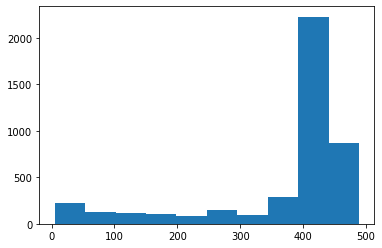

In [3]:
plt.hist(df.groupby('worker_id').count()['rev_id'])
plt.show()

Num of users with min 0 annotations: 4301
Num of users with min 10 annotations: 4239
Num of users with min 20 annotations: 4189
Num of users with min 30 annotations: 4156
Num of users with min 40 annotations: 4128
Num of users with min 50 annotations: 4085
Num of users with min 60 annotations: 4059
Num of users with min 70 annotations: 4032
Num of users with min 80 annotations: 4010
Num of users with min 90 annotations: 3983
Num of users with min 100 annotations: 3944
Num of users with min 110 annotations: 3922
Num of users with min 120 annotations: 3891
Num of users with min 130 annotations: 3866
Num of users with min 140 annotations: 3844
Num of users with min 150 annotations: 3825
Num of users with min 160 annotations: 3804
Num of users with min 170 annotations: 3776
Num of users with min 180 annotations: 3750
Num of users with min 190 annotations: 3723
Num of users with min 200 annotations: 3712
Num of users with min 210 annotations: 3689
Num of users with min 220 annotations: 3672

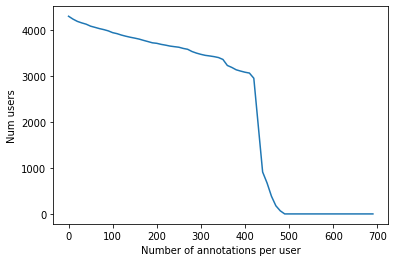

In [4]:
df_gr = df.groupby('worker_id').count()
dom = np.arange(0, 700, 10)
nums = []
for x in dom:
    num_where = len(df_gr[df_gr['rev_id'] >= x])
    print(f'Num of users with min {x} annotations: {num_where}')
    nums.append(num_where)
nums = np.array(nums)
f = np.diff(nums)
print(f'Biggest diff for {dom[np.argmin(f)]} annotations')
plt.plot(dom, nums)
plt.xlabel('Number of annotations per user')
plt.ylabel('Num users')
plt.show()

In [5]:
print(nums[42])
print(nums[41])
print(nums[43])

2952
3065
1930


In [6]:
users = df_gr[df_gr['rev_id'] >= 420].index
print(users)

Int64Index([   0,    2,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            4175, 4181, 4187, 4188, 4200, 4203, 4225, 4238, 4249, 4265],
           dtype='int64', name='worker_id', length=2952)


In [7]:
NUM_USERS = 420
NUM_FOLDS = 10
def flatten(xss):
    return [x for xs in xss for x in xs]

In [8]:
new_dfs = []
for user in users:
    df_w = df[df['worker_id'] == user].sort_values(['toxicity'], ascending=False).head(NUM_USERS)
    folds = flatten([[i] * (NUM_USERS // NUM_FOLDS) for i in range(NUM_FOLDS)])
    np.random.shuffle(folds)
    df_w['fold'] = folds
    new_dfs.append(df_w)
final_df = pd.concat(new_dfs, ignore_index=True)

In [9]:
final_df

,rev_id,worker_id,toxicity,toxicity_score,fold
0,698855095.0,0,1,-1.0,6
1,580525522.0,0,1,-1.0,0
2,177225275.0,0,1,-1.0,2
3,175924806.0,0,1,-1.0,6
4,164821495.0,0,1,-1.0,6
...,...,...,...,...,...
1239835,183057344.0,4265,0,0.0,3
1239836,180142189.0,4265,0,0.0,5
1239837,178666241.0,4265,0,0.0,8
1239838,174793290.0,4265,0,0.0,0


In [10]:
texts = pd.read_csv('/home/konradkaranowski/storage/personalized-nlp/storage/data/wiki_data/toxicity_annotated_comments_processed.csv')
texts['rev_id'] = texts['rev_id'].astype(int)
texts.head(5)

,rev_id,comment,year,logged_in,ns,sample,split,rev_id_original
0,0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,2232.0
1,1,`NEWLINE_TOKENNEWLINE_TOKEN:Clarification for ...,2002,True,user,random,train,4216.0
2,2,Elected or Electoral? JHK,2002,False,article,random,test,8953.0
3,3,`This is such a fun entry. DevotchkaNEWLINE_...,2002,True,article,random,train,26547.0
4,4,Please relate the ozone hole to increases in c...,2002,True,article,random,test,28959.0


In [11]:
dict_map = {int(original['rev_id_original']): int(original['rev_id']) for _, original in texts[['rev_id', 'rev_id_original']].iterrows()}

In [12]:
annotator_id_idx_dict = {
    a_id: idx for idx, a_id in enumerate(pd.unique(final_df['worker_id']))
}

In [13]:
final_df['rev_id_original'] = final_df['rev_id']
final_df['rev_id'] = final_df['rev_id'].apply(lambda x: dict_map[x])

In [14]:
final_df['worker_id_original'] = final_df['worker_id']
final_df['worker_id'] = final_df['worker_id'].apply(lambda x: annotator_id_idx_dict[x])

In [15]:
final_df.rename(columns={'worker_id': 'annotator_id', 'rev_id': 'text_id'})

,text_id,annotator_id,toxicity,toxicity_score,fold,rev_id_original,worker_id_original
0,159471,0,1,-1.0,6,698855095.0,0
1,139785,0,1,-1.0,0,580525522.0,0
2,53509,0,1,-1.0,2,177225275.0,0
3,53129,0,1,-1.0,6,175924806.0,0
4,49973,0,1,-1.0,6,164821495.0,0
...,...,...,...,...,...,...,...
1239835,55292,2951,0,0.0,3,183057344.0,4265
1239836,54402,2951,0,0.0,5,180142189.0,4265
1239837,53953,2951,0,0.0,8,178666241.0,4265
1239838,52798,2951,0,0.0,0,174793290.0,4265


In [16]:
final_df.to_csv('/home/konradkaranowski/storage/personalized-nlp/storage/data/wiki_data/toxicity_annotations_420balanced_folds.csv', index=False)

In [17]:
len(final_df) * 8 / 10

991872.0

In [18]:
final_df

,rev_id,worker_id,toxicity,toxicity_score,fold,rev_id_original,worker_id_original
0,159471,0,1,-1.0,6,698855095.0,0
1,139785,0,1,-1.0,0,580525522.0,0
2,53509,0,1,-1.0,2,177225275.0,0
3,53129,0,1,-1.0,6,175924806.0,0
4,49973,0,1,-1.0,6,164821495.0,0
...,...,...,...,...,...,...,...
1239835,55292,2951,0,0.0,3,183057344.0,4265
1239836,54402,2951,0,0.0,5,180142189.0,4265
1239837,53953,2951,0,0.0,8,178666241.0,4265
1239838,52798,2951,0,0.0,0,174793290.0,4265


In [22]:
def filter_annotations(metrics_df: pd.DataFrame, sort_by: str, ascending: bool, top_perc: float):
    if sort_by == 'random':
        return metrics_df.head(n=int(len(metrics_df) * top_perc))
    sorted_scores = metrics_df.sort_values(by=[sort_by], ascending=ascending)
    
    selected = sorted_scores.head(n=int(len(sorted_scores) * top_perc))
    return selected


In [26]:
final_df.groupby('worker_id').apply(lambda x: filter_annotations(x, sort_by='rev_id', ascending=True, top_perc=0.1))

rev_id  worker_id  toxicity  toxicity_score  fold  \
worker_id                                                              
0         261          41          0         0             0.0     0   
          416         251          0         0             0.0     1   
          341         308          0         0             0.0     8   
          340        1278          0         0             0.0     5   
          339        2050          0         0             0.0     5   
...                   ...        ...       ...             ...   ...   
2951      1239733   13568       2951         0             0.0     8   
          1239732   13718       2951         0             0.0     1   
          1239731   13923       2951         0             0.0     8   
          1239730   14023       2951         0             0.0     3   
          1239729   14413       2951         0             0.0     6   

                   rev_id_original  worker_id_original  
worker_id                                               
0         261             227181.0                   0  
          416            1557225.0                   0  
          341            1985687.0                   0  
          340            8612804.0                   0  
          339           11959295.0                   0  
...                            ...                 ...  
2951      1239733       46750577.0                4265  
          1239732       47169806.0                4265  
          1239731       47635545.0                4265  
          1239730       47908355.0                4265  
          1239729       48807345.0                4265  

[123984 rows x 7 columns]

In [28]:
final_df.reset_index
final_df

,rev_id,worker_id,toxicity,toxicity_score,fold,rev_id_original,worker_id_original
0,159471,0,1,-1.0,6,698855095.0,0
1,139785,0,1,-1.0,0,580525522.0,0
2,53509,0,1,-1.0,2,177225275.0,0
3,53129,0,1,-1.0,6,175924806.0,0
4,49973,0,1,-1.0,6,164821495.0,0
...,...,...,...,...,...,...,...
1239835,55292,2951,0,0.0,3,183057344.0,4265
1239836,54402,2951,0,0.0,5,180142189.0,4265
1239837,53953,2951,0,0.0,8,178666241.0,4265
1239838,52798,2951,0,0.0,0,174793290.0,4265


In [20]:
final_df.groupby('fold').count()

,rev_id,worker_id,toxicity,toxicity_score,rev_id_original,worker_id_original
fold,,,,,,
0,123984,123984,123984,123984,123984,123984
1,123984,123984,123984,123984,123984,123984
2,123984,123984,123984,123984,123984,123984
3,123984,123984,123984,123984,123984,123984
4,123984,123984,123984,123984,123984,123984
5,123984,123984,123984,123984,123984,123984
6,123984,123984,123984,123984,123984,123984
7,123984,123984,123984,123984,123984,123984
8,123984,123984,123984,123984,123984,123984


In [ ]:
final_df.group

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/home/konradkaranowski/storage/personalized-nlp/storage/data/wiki_data/toxicity_annotations.tsv', sep='\t')
idx = df.index.values
np.random.shuffle(idx)

In [8]:
df.iloc[idx, :]

,rev_id,worker_id,toxicity,toxicity_score
1096913,331780668.0,3276,0,1.0
1019378,198544323.0,2727,1,-1.0
270910,13538112.0,2640,0,0.0
1183401,131210818.0,1641,0,1.0
1361510,565045736.0,1580,0,0.0
...,...,...,...,...
503544,379417557.0,3184,0,0.0
1175414,291888537.0,2154,0,1.0
228711,254374507.0,2480,1,-1.0
816664,289320284.0,825,1,-1.0
